In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
Z0 = range(0, 1000)
P00 = range(0, 1000)
P11 = range(0, 1000)

In [3]:
noises = np.random.normal(0, 10.0, 1000)        # gaussian noises with mu=0 and sigma=10.0

In [4]:
sinWave = [ 100 * math.sin(2*3.1416*0.004 * Z0[i]) for i in Z0 ]   # Ideal sinewave


In [5]:
Z = [ sinWave[i] + noises[i] for i in Z0 ]    # noisy measurements = Ideal sinewave + noises

In [6]:
# plt.figure(figsize=(20,10), dpi=80)           # plot measurements
# plt.plot(Z0, Z, 'ok')

In [7]:
dt = 1

In [8]:
X = np.array([[0.0, 0.0]]).T         # X is 2x1 array, which is [pos, vel].T

In [9]:
P = np.array([[0.1, 0], [0, 0.1]])

In [10]:
A = np.array([[1, dt], [0, 1]])

In [11]:
B = np.array([[0.5*dt*dt], [dt]])

In [12]:
#u = [random.uniform(-1.0, 1.0)*0.1 for i in Z0]    # external inputs in uniform random dist.

In [13]:
Q = np.array([[0.1, 0], [0, 0.0001]])   # prediction noise wk ~ N(0, Q)

In [14]:
H = np.array([[1, 0]])                 # we have only position observation

In [15]:
R = 10.0                              # measurement noise vk ~ N(0, R)

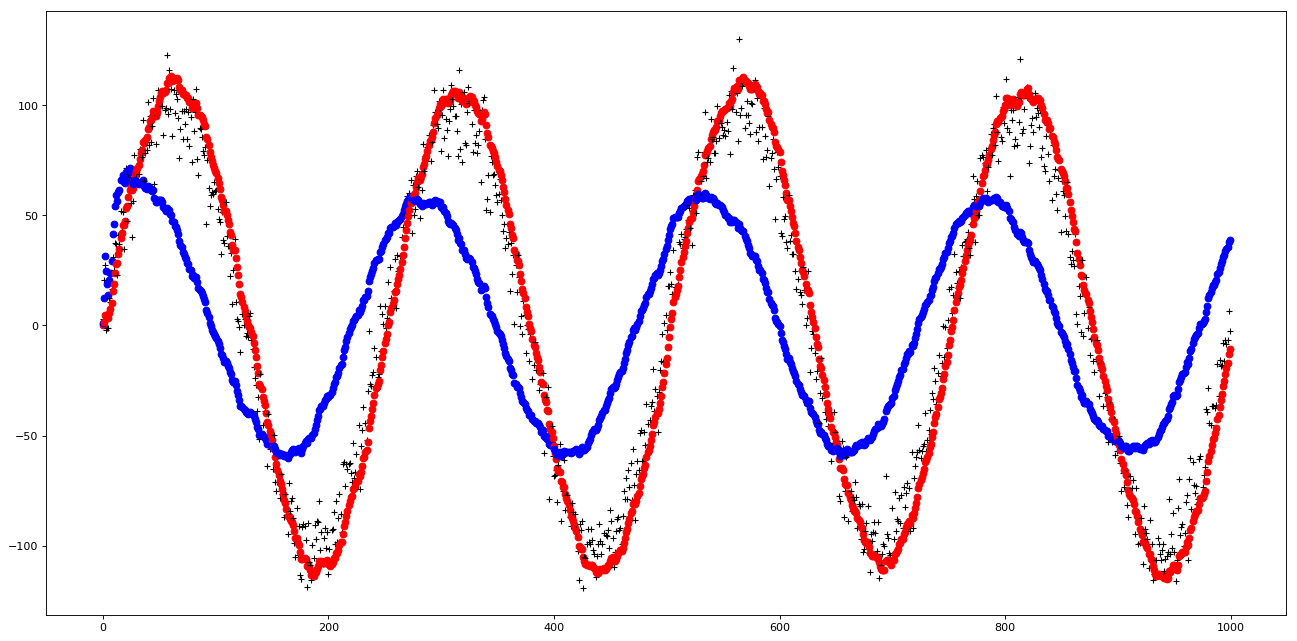

In [16]:
plt.figure(figsize=(20,10), dpi=80)
for i in Z0:
    X_ = A.dot(X)
    P_ = A.dot(P).dot(A.T) + Q
    K = P_.dot(H.T).dot(np.linalg.inv(H.dot(P_).dot(H.T) + R))
#     print(K.shape)
    X = X_ + K.dot(Z[i] - H.dot(X_))
#     print(X.shape)
    P = (np.eye(2) - K.dot(H)).dot(P_)
    P00[i] = P[0,0]
    P11[i] = P[1,1]
    
    plt.plot(Z0[i], Z[i], 'k+', label="measured")  # observations
    plt.plot(Z0[i], X[0,0], 'ro', label="pos")     # estimated pos   
    plt.plot(Z0[i], 30.0*X[1,0], 'bo', label="vel")   # estimated vel   



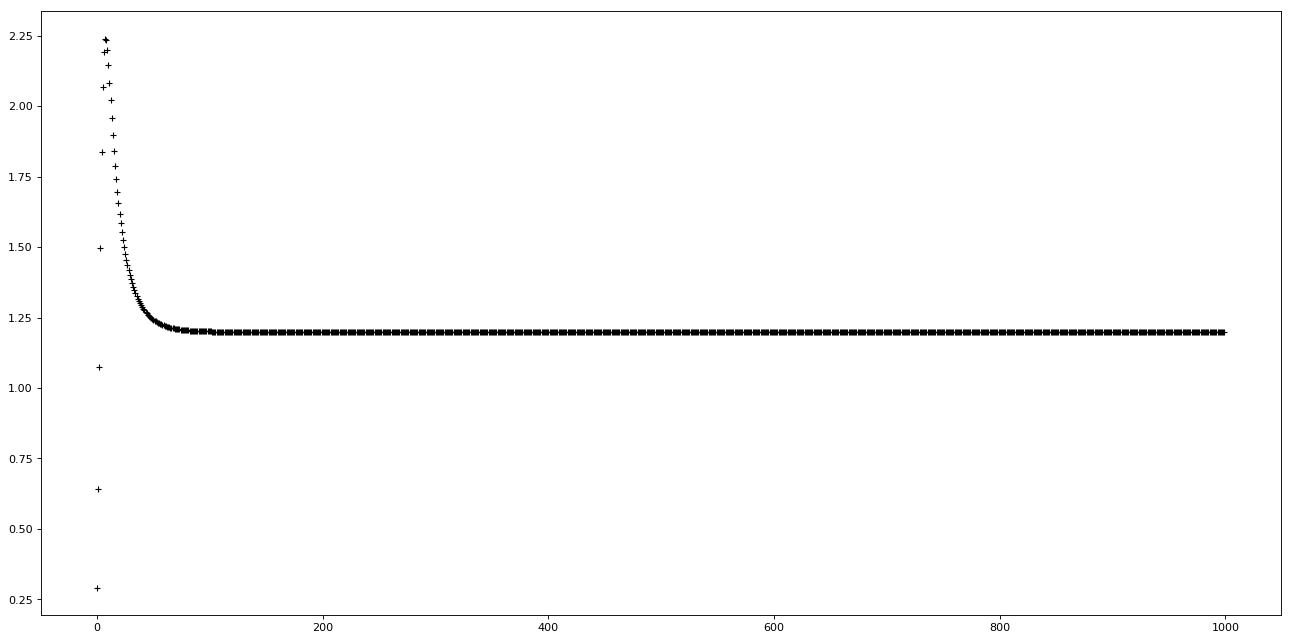

In [17]:
plt.figure(figsize=(20,10), dpi=80)
for i in Z0:
    plt.plot(Z0[i], P00[i], 'k+', label="measured")  # P[0,0]

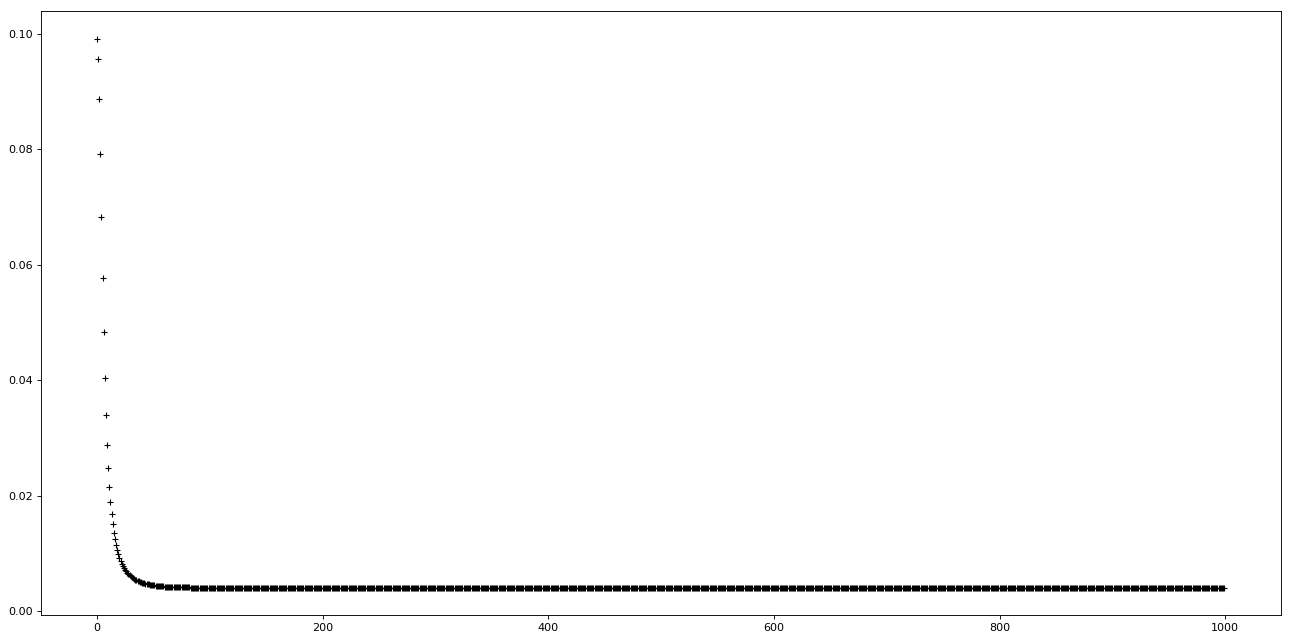

In [18]:
plt.figure(figsize=(20,10), dpi=80)
for i in Z0:
    plt.plot(Z0[i], P11[i], 'k+', label="measured")  # P[1,1]